[-417 -430 -424 ...  378  373  372]


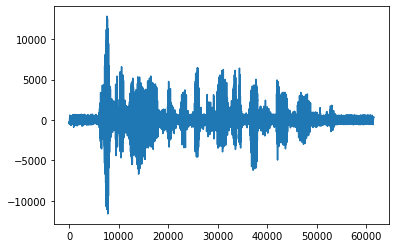

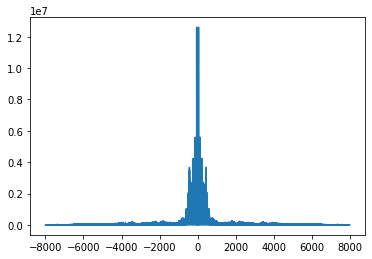

In [61]:
from scipy import signal
from scipy.io import wavfile
from scipy.fft import fft, fftfreq, ifft
import matplotlib.pyplot as plt
import numpy as np

#считали звуковой файл
sr, data = wavfile.read("Mono16kHz.wav")

#смотрим на наш сигнал
plt.plot(data)
plt.show()




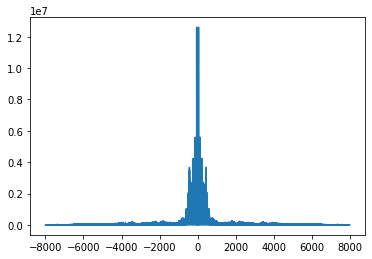

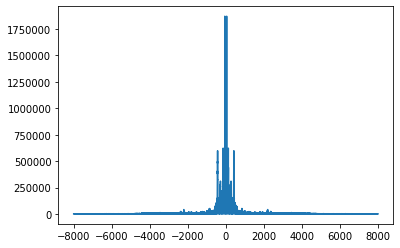

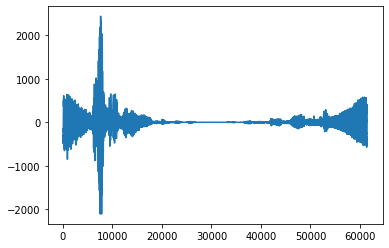

D:\miniconda3\lib\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


In [109]:
yf = fft(data)#прямое одномерное ДПФ.
xf = fftfreq(len(data), 1 / 16000)#перевод оси x-ов в частотную
#смотрим на частотный спектр нашего сигнала
plt.plot(xf, np.abs(yf))#np.abs() вычисляет корень суммы квадратов реальной и мнимой части
plt.show()
#применяем фильтр нижних частот
#wn = 2 * 1000 / 16000 = 0.125
b, a = signal.butter(1, 0.125, "lowpass")#готовим b и a для наложения фильтра нижних частот
filtedData = signal.filtfilt(b, a, yf)#отсеиваем все что больше 1кГц


plt.plot(xf, np.abs(filtedData))#смотрим что верхние частоты в самом деле ушли
plt.show()

filtered = ifft(filtedData)#обратное фурье (правда на выходе все еще комплексное число)

plt.plot(filtered.real)#смотрим на преобразившийся сигнал. середина записи угашена
plt.show()

norm_new_sig = np.int16(filtered * (32767 / filtered.max()))#без нормировки на записи получается скример
wavfile.write("LowFilteredMono16kHz.wav", 16000, norm_new_sig)#записали чтобы послушать

In [104]:
#Echo
#Сначала фильтруем сумму сигналов с помощью ФНЧ первого порядка, потом прибавляем к изначальному. 
#D1 - задержка, задается пользователем
#Di=D1*2*(1-i)/Nl где Nl - число линий задержки (Nl >= 8)
#Первое эхо накладывается после D1, второе D2 и т.д.
#для задержки - смещать его на Di, после этого домножаем на альфу


In [ ]:
#Distortion
#Задаем порог Th. Если сигнал меньше порога - оставляем как есть, если больше - приравниваем максимуму
